In [1]:
!pip install missingno
!pip install xgboost
!pip install --pre pycaret

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
df0 = pd.read_csv("data_strokes_prediction.csv")

In [4]:
len(df0), len(df0.columns)

(5110, 12)

In [5]:
df0.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df0['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
df=df0

In [8]:
def clean(df):
    

    df=df.drop(['id'],axis=1) #drop useless column

    df=df.dropna(axis=0) #drop null values
    
    df['stroke']=df['stroke'].astype(str)


    le=LabelEncoder()
    cat_cols=df[['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status']]
    for col in cat_cols: 
        le.fit(df[col])
        df[col] = le.transform(df[col])
        
    return df




def transform(df):

    X = df.drop('stroke', axis = 1)
    y = df['stroke']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    print('Class distribution before resampling:', y_train.value_counts())
    print('Class distribution after resampling:', y_train_res.value_counts())
        
    return df



df = clean(df)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [10]:
# look like avg glucose level has 2 quite distinct clusters among those who had strokes

fig = px.scatter_3d(df, x='age', y='avg_glucose_level', z='bmi',
              color='stroke')
fig.show()

In [11]:
df=transform(df)

Class distribution before resampling: 0    3771
1     156
Name: stroke, dtype: int64
Class distribution after resampling: 0    3771
1    3771
Name: stroke, dtype: int64


In [14]:
X = df.drop('stroke', axis = 1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [15]:
train_data = pd.concat([X_train_res, y_train_res], axis=1)

s = setup(data=train_data, target='stroke', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(7542, 11)"
5,Transformed data shape,"(7542, 11)"
6,Transformed train set shape,"(5279, 11)"
7,Transformed test set shape,"(2263, 11)"
8,Numeric features,10
9,Preprocess,True


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9536,0.9914,0.9655,0.9432,0.9542,0.9072,0.9076,0.0990
lightgbm,Light Gradient Boosting Machine,0.9530,0.9891,0.9667,0.9413,0.9537,0.9060,0.9066,0.1260
et,Extra Trees Classifier,0.9496,0.9912,0.9701,0.9321,0.9506,0.8992,0.9001,0.1430
rf,Random Forest Classifier,0.9494,0.9905,0.9670,0.9344,0.9503,0.8988,0.8997,0.1060
dt,Decision Tree Classifier,0.9178,0.9178,0.9424,0.8985,0.9197,0.8356,0.8370,0.0180
gbc,Gradient Boosting Classifier,0.8839,0.9550,0.9193,0.8588,0.8879,0.7678,0.7699,0.0850
knn,K Neighbors Classifier,0.8710,0.9406,0.9500,0.8208,0.8805,0.7420,0.7519,0.2260
ada,Ada Boost Classifier,0.8424,0.9300,0.8754,0.8214,0.8474,0.6848,0.6865,0.0570
qda,Quadratic Discriminant Analysis,0.8214,0.9023,0.8777,0.7890,0.8309,0.6427,0.6470,0.0210
lr,Logistic Regression,0.8094,0.8950,0.8307,0.7969,0.8134,0.6189,0.6195,0.8480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [17]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9640,0.9948,0.9735,0.9554,0.9644,0.9280,0.9282
1,0.9545,0.9907,0.9773,0.9348,0.9556,0.9091,0.9100
2,0.9621,0.9905,0.9735,0.9519,0.9625,0.9242,0.9245
3,0.9527,0.9890,0.9773,0.9314,0.9538,0.9053,0.9064
4,0.9470,0.9912,0.9583,0.9370,0.9476,0.8939,0.8942
5,0.9432,0.9904,0.9508,0.9366,0.9436,0.8864,0.8865
6,0.9716,0.9935,0.9811,0.9628,0.9719,0.9432,0.9434
7,0.9394,0.9898,0.9470,0.9328,0.9398,0.8788,0.8789
8,0.9602,0.9913,0.9508,0.9691,0.9598,0.9205,0.9206


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(xg, X_train_res, y_train_res, cv=20)

In [19]:
preds = predict_model(xg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9646,0.9947,0,0,0,0.9293,0.9294


In [20]:
preds

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,prediction_label,prediction_score
5279,0,27.000000,0,0,1,2,1,71.500000,40.299999,3,0,0,0.9999
5280,0,47.000000,0,0,1,3,0,157.770004,28.400000,2,0,0,0.9971
5281,0,81.999596,0,0,1,0,0,103.680969,24.999878,1,1,1,0.9832
5282,0,38.000000,0,0,1,0,0,64.269997,27.299999,2,0,0,0.9980
5283,1,48.000000,0,0,0,2,1,80.860001,27.500000,0,0,0,0.8154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,0,76.000000,0,0,1,0,0,84.209999,24.400000,2,0,0,0.9865
7538,0,47.000000,0,0,1,2,1,104.699997,20.700001,3,0,0,0.9604
7539,1,34.000000,0,0,1,2,1,61.110001,29.299999,2,0,0,0.9890
7540,1,53.087044,0,0,1,2,0,70.501808,28.591295,2,1,1,0.5179


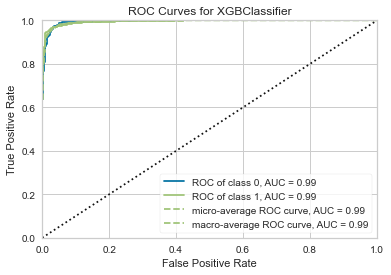

In [21]:
plot_model(xg)

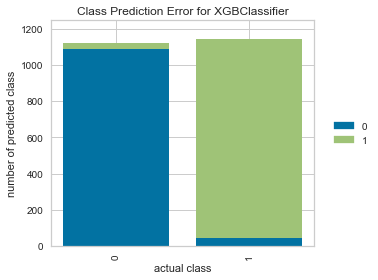

In [22]:
plot_model(xg, plot='error')

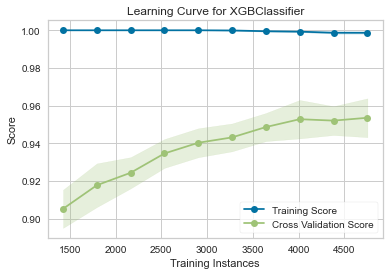

In [23]:
plot_model(xg, plot = 'learning')

In [24]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [25]:
# normalized_arr = preprocessing.normalize(df)
# df_normalized = pd.DataFrame(normalized_arr)
# df_normalized.head()

In [26]:
# looking on correlations in data with the correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000


In [27]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Feature: 0, Score: -0.07861
Feature: 1, Score: -0.45829
Feature: 2, Score: 0.26020
Feature: 3, Score: 0.19016
Feature: 4, Score: -0.12267
Feature: 5, Score: -0.40688
Feature: 6, Score: 0.03563
Feature: 7, Score: -0.64036
Feature: 8, Score: -0.52091
Feature: 9, Score: 0.47843
Feature: 10, Score: 0.16818


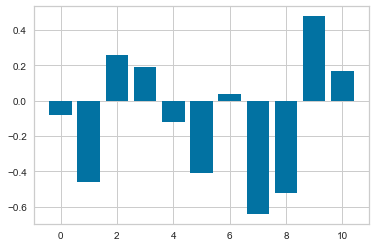

,name,coef
9,smoking_status,0.478434
2,hypertension,0.260197
3,heart_disease,0.190156
10,stroke,0.168181
6,Residence_type,0.035626


In [28]:
#The positive scores indicate a feature that predicts class 1, 
# whereas the negative scores indicate a feature that predicts class 0.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=len(df.columns), n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

dfi = pd.DataFrame(columns=['name','coef'])    
dfi['name']=df.columns
dfi['coef']=importance
# dfi['coef']=round(dfi['coef'])
dfi=dfi.sort_values(by='coef',ascending=False)
dfi=dfi[dfi['coef']>0]
dfi

Feature: 0, Score: 0.02448
Feature: 1, Score: 0.17814
Feature: 2, Score: 0.04073
Feature: 3, Score: 0.07552
Feature: 4, Score: 0.11200
Feature: 5, Score: 0.09935
Feature: 6, Score: 0.04949
Feature: 7, Score: 0.12274
Feature: 8, Score: 0.07764
Feature: 9, Score: 0.15434
Feature: 10, Score: 0.06556


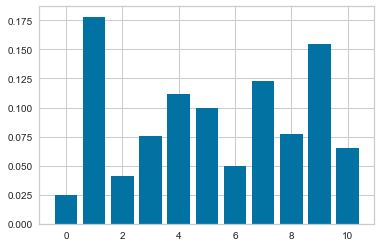

,name,coef
1,age,0.178145
9,smoking_status,0.154341
7,avg_glucose_level,0.122738
4,ever_married,0.112000
5,work_type,0.099346
8,bmi,0.077645
3,heart_disease,0.075523
10,stroke,0.065565
6,Residence_type,0.049489
2,hypertension,0.040731


In [29]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=len(df.columns), n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

dfi = pd.DataFrame(columns=['name','coef'])    
dfi['name']=df.columns
dfi['coef']=importance
# dfi['coef']=round(dfi['coef'])
dfi=dfi.sort_values(by='coef',ascending=False)
dfi=dfi[dfi['coef']>0]
dfi
    

Feature: 0, Score: 0.01749
Feature: 1, Score: 0.27775
Feature: 2, Score: 0.03413
Feature: 3, Score: 0.11767
Feature: 4, Score: 0.06478
Feature: 5, Score: 0.10292
Feature: 6, Score: 0.02987
Feature: 7, Score: 0.06686
Feature: 8, Score: 0.10905
Feature: 9, Score: 0.14064
Feature: 10, Score: 0.03883


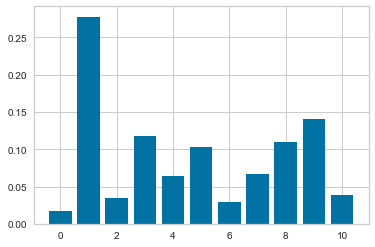

,name,coef
1,age,0.277755
9,smoking_status,0.140640
3,heart_disease,0.117671
8,bmi,0.109055
5,work_type,0.102920
7,avg_glucose_level,0.066860
4,ever_married,0.064780
10,stroke,0.038834
2,hypertension,0.034127
6,Residence_type,0.029872


In [30]:

# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=len(df.columns), n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

dfi = pd.DataFrame(columns=['name','coef'])    
dfi['name']=df.columns
dfi['coef']=importance
# dfi['coef']=round(dfi['coef'])
dfi=dfi.sort_values(by='coef',ascending=False)
dfi=dfi[dfi['coef']>0]
dfi

In [31]:
# sns.pairplot(df0)

In [32]:
# msno.matrix(df0)

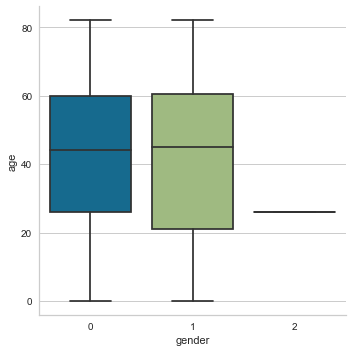

In [33]:
sns.catplot(data=df, x="gender", y="age", kind='box')

<AxesSubplot:xlabel='gender', ylabel='stroke'>

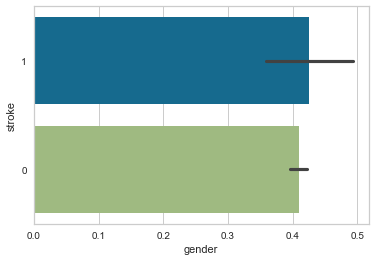

In [34]:
sns.barplot(data=df, y='stroke', x='gender')

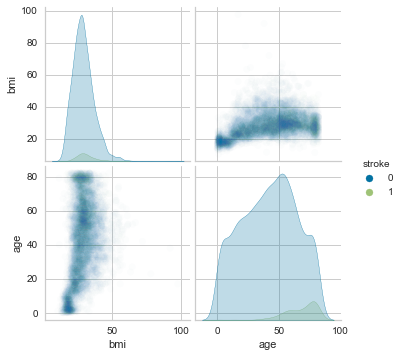

In [35]:
sns.pairplot(df0[['stroke','bmi', 'age']], hue='stroke', plot_kws={'alpha': 0.01})